# TAREA SVM 
## Ralphy Núñez Mercado
##### En este caso utiliza un par de datasets de los ya utilizados en clase (uno de regresión y otro de clasificación) para probar SVM. Prueba con distintos kernels.
##### Puedes utilizar también, como en la tarea anterior, un VotingClassifier/VotingRegressor para combinarlo con otros modelos de clasificación/regresión.
##### Documenta todo el proceso.

### ⬇️ Imports necesarios

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error ,r2_score, classification_report,mean_absolute_error,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, VotingRegressor,RandomForestRegressor,StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

### 📜 🔨 Preparar los datasets

### Dataset accidentes

In [2]:
df_accidentes = pd.read_csv("accident.csv")

df_accidentes.columns =['Edad','Genero','Velocidad_del_impacto','Uso_de_casco','Uso_de_cinturon','Sobrevivio']

label_encoder = LabelEncoder()

columns_to_encode = ['Genero', 'Uso_de_casco', 'Uso_de_cinturon']  

for col in columns_to_encode:
    df_accidentes[col] = label_encoder.fit_transform(df_accidentes[col])

df_accidentes = df_accidentes.fillna(df_accidentes.mean())

X_accidentes = df_accidentes.drop(columns='Sobrevivio')
y_accidentes = df_accidentes['Sobrevivio']

X_train_accidentes, X_test_accidentes, y_train_accidentes, y_test_accidentes = train_test_split(X_accidentes, y_accidentes, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_accidentes_escalado = scaler.fit_transform(X_train_accidentes)

X_test_accidentes_escalado = scaler.transform(X_test_accidentes)

### Dataset cáncer

In [3]:
df_cancer = pd.read_csv('Breast_Cancer.csv')

df_cancer = df_cancer.drop("Unnamed: 32",axis=1)

df_cancer.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]


X_cancer  = df_cancer[["radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]]
df_cancer['diagnostico'] = df_cancer.diagnostico.map({'M' : 1, 'B' : 0 })
y_cancer = df_cancer['diagnostico']

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

## MODELOS SVR VS. VOTING REGRESSOR

### SVR

#### Entrenar el modelo

In [4]:
svr_linear = SVR(kernel='linear') 
svr_linear.fit(X_train_accidentes_escalado, y_train_accidentes) 

svr_poly = SVR(kernel='poly') 
svr_poly.fit(X_train_accidentes_escalado, y_train_accidentes) 

svr_rbf = SVR(kernel='rbf') 
svr_rbf.fit(X_train_accidentes_escalado, y_train_accidentes) 

svr_sigmoid = SVR(kernel='sigmoid') 
svr_sigmoid.fit(X_train_accidentes_escalado, y_train_accidentes) 
  
y_pred_svr_linear = svr_linear.predict(X_test_accidentes_escalado) 
  
y_pred_svr_poly = svr_poly.predict(X_test_accidentes_escalado) 

y_pred_svr_rbf = svr_rbf.predict(X_test_accidentes_escalado) 

y_pred_svr_sigmoid = svr_sigmoid.predict(X_test_accidentes_escalado) 


#### 📈Métricas

In [5]:
mse = mean_squared_error(y_test_accidentes, y_pred_svr_linear)
print("MSE (Error Cuadrático Medio:", mse)


mse = mean_squared_error(y_test_accidentes, y_pred_svr_poly)
print("MSE (Error Cuadrático Medio:", mse)


mse = mean_squared_error(y_test_accidentes, y_pred_svr_rbf)
print("MSE (Error Cuadrático Medio:", mse)


mse = mean_squared_error(y_test_accidentes, y_pred_svr_sigmoid)
print("MSE (Error Cuadrático Medio:", mse)


MSE (Error Cuadrático Medio: 0.50174325699696
MSE (Error Cuadrático Medio: 1.0877162682871886
MSE (Error Cuadrático Medio: 0.4295413167858898
MSE (Error Cuadrático Medio: 2.6286960916649114


### VotingRegressor

In [6]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

er.fit(X_train_accidentes_escalado,y_train_accidentes)

prediccion_vino2 = er.predict(X_test_accidentes_escalado)


mse = mean_squared_error(y_test_accidentes, prediccion_vino2)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test_accidentes, prediccion_vino2)
r2 = r2_score(y_test_accidentes, prediccion_vino2)

print("MSE (Error Cuadrático Medio:", mse)


MSE (Error Cuadrático Medio: 0.2874306299669774


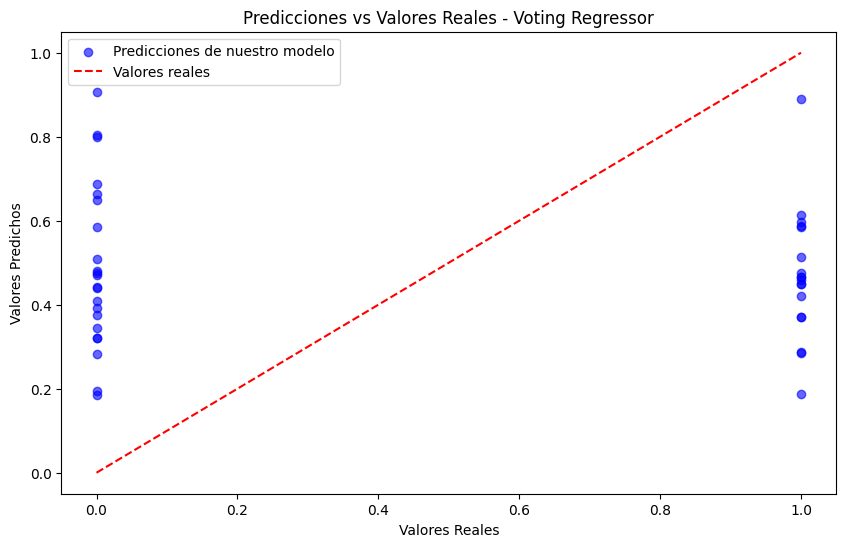

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_accidentes, prediccion_vino2, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test_accidentes.min(), prediccion_vino2.min()), max(y_test_accidentes.max(), prediccion_vino2.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Voting Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

## Conclusiones

#### El modelo voting regressor nos da el mejor resultado con un MSE de 0.28 mientras que con el modelo SVR el mejor kernel sería el RBF con un valor de 0.42

## MODELOS SVC VS VOTING CLASSIFIER

### SVC

#### ⚙️ Entrenar el modelo

In [8]:
clf_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
clf_linear.fit(X_train_cancer, y_train_cancer)

clf_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
clf_poly.fit(X_train_cancer, y_train_cancer)

clf_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
clf_rbf.fit(X_train_cancer, y_train_cancer)

clf_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
clf_sigmoid.fit(X_train_cancer, y_train_cancer)

y_pred_svc_linear = clf_linear.predict(X_test_cancer)
y_pred_svc_poly = clf_poly.predict(X_test_cancer)
y_pred_svc_rbf = clf_rbf.predict(X_test_cancer)
y_pred_svc_sigmoid = clf_sigmoid.predict(X_test_cancer)



#### 📈Métricas

In [9]:

print("SVC con kernel Linear")
print(classification_report(y_test_cancer,y_pred_svc_linear))
print("SVC con kernel Poly")
print(classification_report(y_test_cancer,y_pred_svc_poly))
print("SVC con kernel RBF")
print(classification_report(y_test_cancer,y_pred_svc_rbf))
print("SVC con kernel Sigmoid")
print(classification_report(y_test_cancer,y_pred_svc_sigmoid))


SVC con kernel Linear
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVC con kernel Poly
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        71
           1       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114

SVC con kernel RBF
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg 

### Como vemos el que mejor resultados da es el RBF

#### Matriz de confusión

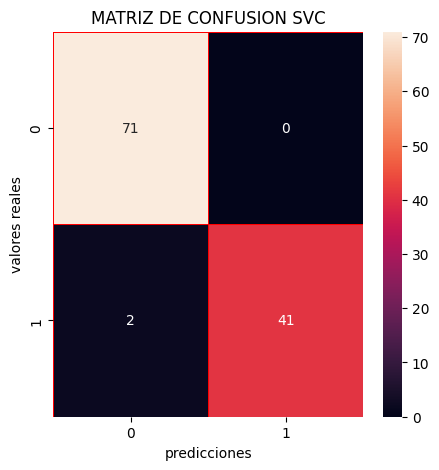

In [10]:
cm= confusion_matrix(y_test_cancer,y_pred_svc_rbf) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION SVC")
plt.show()

### VotingClassifer 

In [11]:

scaler = StandardScaler()
X_train_cancer_escalado = scaler.fit_transform(X_train_cancer)
X_test_cancer_escalado = scaler.transform(X_test_cancer)

clf1 = LogisticRegression(random_state=1,max_iter=500)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

eclf1 = eclf1.fit(X_train_cancer_escalado, y_train_cancer)


eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

eclf2 = eclf2.fit(X_train_cancer_escalado, y_train_cancer)


pred_cancer_votingClassifier_hard = eclf1.predict(X_test_cancer_escalado)
pred_cancer_votingClassifier2_soft = eclf2.predict(X_test_cancer_escalado)


#### 📈Métricas

In [12]:
print(classification_report(y_test_cancer,pred_cancer_votingClassifier_hard))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Matriz de confusión

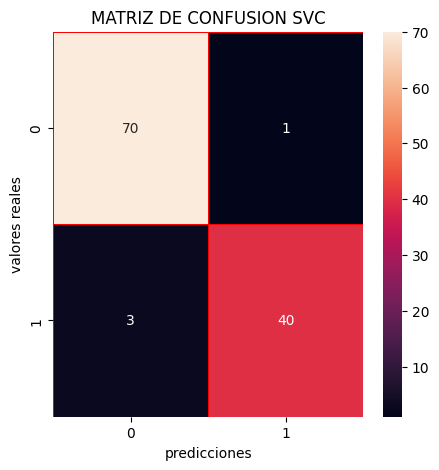

In [13]:
cm= confusion_matrix(y_test_cancer,pred_cancer_votingClassifier_hard) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION SVC")
plt.show()

## Conclusion SVC VS VOTING CLASSIFIER

#### Como podemos ver el model SVC con el kernel RBF es nuestra mejor opción para este dataset, aún así voting classifier también es una buena opción.
